# <center> _*Homework 1 - Solution*_ <br> <br> _ERIS AZIZAJ_ <br> <br> September 27, 2018

## Question 1

Use summary() on the dataset for a preliminary exploration. Comment on the
results. Are the features balanced? Are they in the right range? How many NAs? How do
you suggest dealing with possible problems?

**Answer:** First thing to do is to check the summary statistics and the class of the variables.
When we do that we see that some variables like cylinder, origin, model year should be
categorical because it takes only a few values. Another thing that captures my attention are
the NA's at horsepower variable which tells us that the data is not balanced. Since there are
only 6 NA's (few compared to the total number of observations we have), I suggest removing
these observations before doing any analysis and this will not have a significant impact in
our results.

In [15]:
#import the dataset
data <- read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", na.strings=c('NA','','?'), stringsAsFactors = F)
colnames(data) <- c("mpg", "cylinders","displacement", "horsepower","weight", "acceleration", "model_year", "origin", "car_name" )

#lets check the class of each variable
sapply(data, class)


mpg    cylinders displacement   horsepower       weight acceleration 
   "numeric"    "integer"    "numeric"    "numeric"    "numeric"    "numeric" 
  model_year       origin     car_name 
   "integer"    "integer"  "character"

In [13]:
#check the summaries of variables
summary(data)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   Median : 93.5   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   Mean   :104.5   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:126.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :6                     
  acceleration     model_year        origin        car_name        
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   Length:398        
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:1.000   Class :character  
 Median :15.50   Median :76.00   Median :1.000   Mode  :character  
 Mean   :15.57   Mean   :76.01   Mean   :1.573                     
 3rd Qu.:17.18   3rd

We see that only `horsepower` has 6 missing values.

In [16]:
#specifying data types and recheck class
data$cylinders <- factor(data$cylinders)
data$model_year <- factor(data$model_year)
data$origin <- factor(data$origin)
sapply(data, class)


mpg    cylinders displacement   horsepower       weight acceleration 
   "numeric"     "factor"    "numeric"    "numeric"    "numeric"    "numeric" 
  model_year       origin     car_name 
    "factor"     "factor"  "character"

=====================================================================================================================

## Question 2

Report the mean value and standard deviation for numerical attributes. Remove NA's as necessary before computing these statistics.

**Answer:**

In [17]:
#removing NA`s
data_cleaned <- na.omit(data)
summary(data_cleaned)

      mpg        cylinders  displacement     horsepower        weight    
 Min.   : 9.00   3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   5:  3     Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60             Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                         
  acceleration     model_year  origin    car_name        
 Min.   : 8.00   73     : 40   1:245   Length:392        
 1st Qu.:13.78   78     : 36   2: 68   Class :character  
 Median :15.50   76     : 34   3: 79   Mode  :character  
 Mean   :15.54   75     : 30                             
 3rd Qu.:17.02   82     : 30                             
 Max.   :24.80   70     : 29                             
  

In [18]:
#computing mean and sd for numerical attributes
means <- as.table(sapply(data_cleaned[,c(1,3,4,5,6)], mean))
std_dev <- as.table(sapply(data_cleaned[,c(1,3,4,5,6)], sd))
table <- rbind(means, std_dev)
print(table)

              mpg displacement horsepower    weight acceleration
means   23.445918      194.412  104.46939 2977.5842    15.541327
std_dev  7.805007      104.644   38.49116  849.4026     2.758864


=====================================================================================================================

## Question 3

Plot the correlation matrix for attributes 1-7. Interpret the results.

**Answer:** The table below shows the correlation between the numerical variables. Variables `displacement`, `horsepower`, `weight` have a strong and negative correlation with `mpg`. This tells us that cars that tend to have higher mpg tend to have lower displacement, horsepower and weight. It is the opposite for the variable acceleration since it is positively correlated with mpg but has a weaker correlation. We can say that cars that tend to have high mpg tend to have
high acceleration but the correlation is not that strong as it used to be for displacement, horsepower and weight. Same logic applies to other results. Variable displacement has a high and positive correlation with horsepower and weight but a negative correlation with mpg and acceleration. The sign of each number in the correlation matrix tells us the direction while the number tells the strength of the correlation between the two variables.

In [21]:
#computing the correlation matrix
corr_matrix <- cor(data_cleaned[-c(2,7,8,9)])
corr_matrix

,mpg,displacement,horsepower,weight,acceleration
mpg,1.0000000,-0.8051269,-0.7784268,-0.8322442,0.4233285
displacement,-0.8051269,1.0000000,0.8972570,0.9329944,-0.5438005
horsepower,-0.7784268,0.8972570,1.0000000,0.8645377,-0.6891955
weight,-0.8322442,0.9329944,0.8645377,1.0000000,-0.4168392
acceleration,0.4233285,-0.5438005,-0.6891955,-0.4168392,1.0000000


=====================================================================================================================

## Question 4

Create a scatter plot for attributes 1 and 4 of your dataset and a second scatter plot for attributes 3 and 5. Then, add the number of cylinders to both scatter plots using dots of different colors. Add the 4 scatter plots to your report and interpret your findings.

**Answer:** This question support our findings from the correlation matrix. As we can see from the Fig below, upper plots, cars that have high mpg tend to have lower horsepower and cars that have high displacements tend to be more heavy in weight. By adding the cylinder variable we are distinguishing between the categories. As we can see from the plots, cars that have 8 cylinders have low mpg but high displacement, horsepower and weight which is exactly the same as we found from the correlation matrix. Cars of cylinder category of 4 have high mpg but low horsepower, displacement and weight.

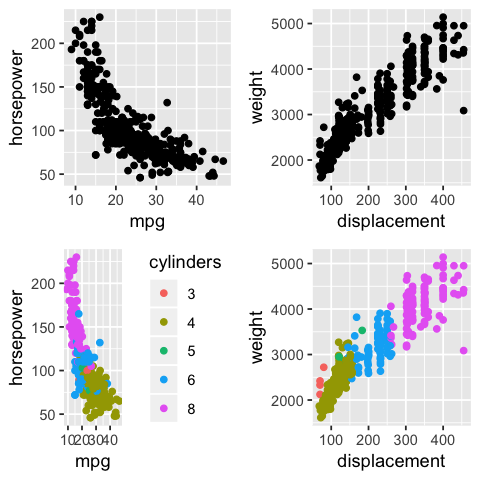

In [50]:
#scaterplots
par(mfrow=c(2,2))
p1 <- ggplot(data_cleaned, aes(mpg, horsepower)) + geom_point()
p2 <- ggplot(data_cleaned, aes(displacement, weight)) + geom_point()
p3 <- ggplot(data_cleaned, aes(mpg, horsepower, colour = cylinders)) + geom_point()
p4 <- ggplot(data_cleaned, aes(displacement, weight, colour = cylinders)) +
geom_point() + guides(colour="none") #guides() neglects the legend

#aranging plots
library(gridExtra)
grid.arrange(p1,p2,p3,p4,nrow=2)

#lets set the plot width and height to width=4 and heigh=4
options(repr.plot.width=4, repr.plot.height=4)

=====================================================================================================================

## Question 5

Create histograms and density plots for attributes 3, 4 and 5. How did you choose the bin size for the different histograms? What do these plots tell us about the variable distributions? Do you notice outliers or skewedness in the data?

**Answer:** In the beggining I tried different possible values for the bin size before deciding for the final one. I tried to choose the bin size that best describe the variable distribution. Another indicator of deciding the bin size might be the summary statistics. For example the variable weight has a much wider range than the other two variables, so the bin size will be larger. Later, I found [this](https://sciencing.com/determine-bin-width-histogram-8485512.html) website article useful, according to which in order to find the ideal bin size we do the following: take the inverse of the cubic root of the number of observations, multiply it with the 3.49 times the standard deviation of the variable. As we can see from the Fig below the distribution from the histogram plots is very similar to the distribution of the density plots. We can see that displacement and horsepower has outliers as the distribution in the left hand side is very small, however we can not say the same thing for weight.

In [36]:
#sd for the 3rd,4th and 5th attribute
sapply(data_cleaned[,c(3,4,5)], sd)

displacement   horsepower       weight 
   104.64400     38.49116    849.40256

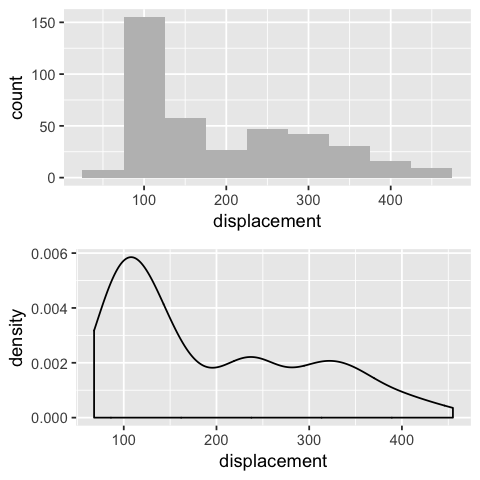

In [64]:
#histograms and density plots for displacement
p5 <- ggplot(data_cleaned) + geom_histogram( aes(displacement), binwidth=50, fill="gray")
p6 <- ggplot(data_cleaned, aes(displacement)) + geom_density()
grid.arrange(p5,p6,ncol=1)
options(repr.plot.width=4, repr.plot.height=4)

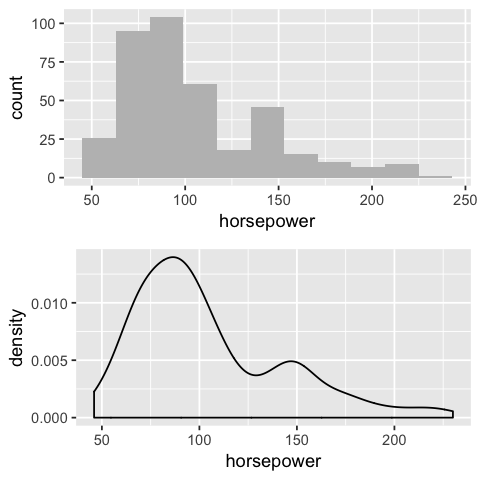

In [65]:
#histograms and density plots for horsepower
p7 <- ggplot(data_cleaned) + geom_histogram(aes(horsepower), binwidth=18, fill="gray")
p8 <- ggplot(data_cleaned, aes(horsepower)) + geom_density()
grid.arrange(p7,p8,ncol=1)

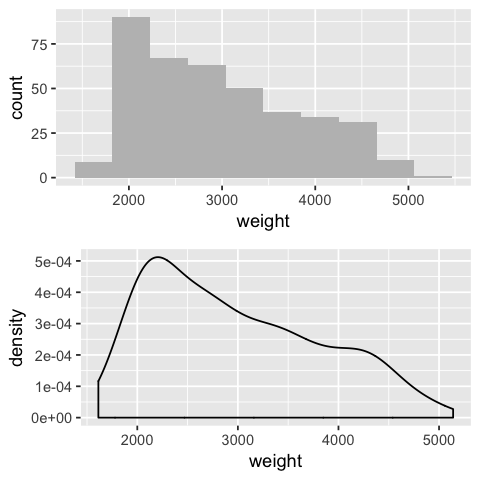

In [66]:
#histograms and density plots for weight
p9 <- ggplot(data_cleaned) + geom_histogram(aes(weight), binwidth=405, fill="gray")
p10 <- ggplot(data_cleaned, aes(weight)) + geom_density()
grid.arrange(p9,p10,ncol=1)

=====================================================================================================================

## Question 6

Create box plots for attributes 4, 5 and 6; one for the whole dataset, one
divided by cylinder number, and one divided by origin. Interpret the obtained 9 boxplots.

**Answer:** Variable horsepower's boxplot seem to have a median of 93.5 with 25th and 75th percentile of value 75 and 126 respectively, 50% of the data lie between these two values. The min and max non-outlier values are around 47 and 200. It has outliers above the value 200. When divided by the number of cylinders, 50% of the data lie on a smalller range. The median is around 35, the 25th and 75th percentiles are 27 and 43 respectively. The min and max non-outliers values are around 18 and 58. It has outliers above the value 90. When divided by the origin the datapoint are more spread as we can see by the box being at larger ranges. Weight variable have median around 2804 with 25th and 75th percentiles 2225 and 3615, respectively. It has no outliers. The min and max non-outlier values are around 1600 and 5100. When divided by the number of cylinders seems to have a median of 950 with 25th and 75th percentile 800 and 1125 respectively. It starts having outliers. When divided by the origin the distribution range is much larger than it used to be in the beginning where now 50% of the data lie between 1000 and 3550. Acceleration variable have median 15.5 with 25th and 75th percentile of value 13.78 and 17.02, respectively. It has outliers from below and above. When divided by the number of cylinders it has median of 6.5 and 50% of the data lie between values 3 and 8. When divided by the origin median is 12.5 with 25th and 75th percentile of value 7.5 and 16 respectively

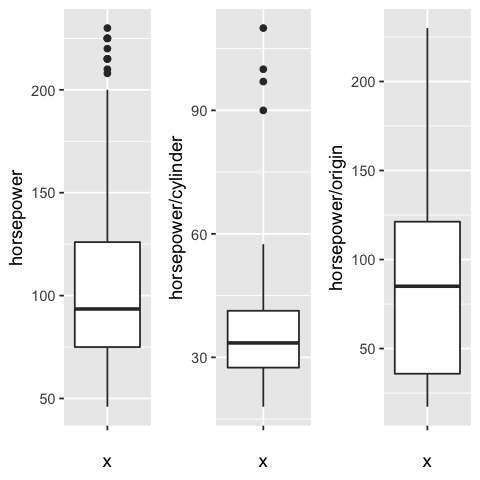

In [67]:
#boxplots for horsepower
p11 <- ggplot(data_cleaned, aes(x="",y=horsepower)) + geom_boxplot()
p12 <- ggplot(data_cleaned, aes(x="",y=horsepower/as.numeric(as.factor(cylinders)))) + geom_boxplot()+ labs(y="horsepower/cylinder")
p13 <- ggplot(data_cleaned, aes(x="",y=horsepower/as.numeric(as.factor(origin)))) + geom_boxplot()+labs(y="horsepower/origin")
grid.arrange(p11,p12,p13, nrow=1)

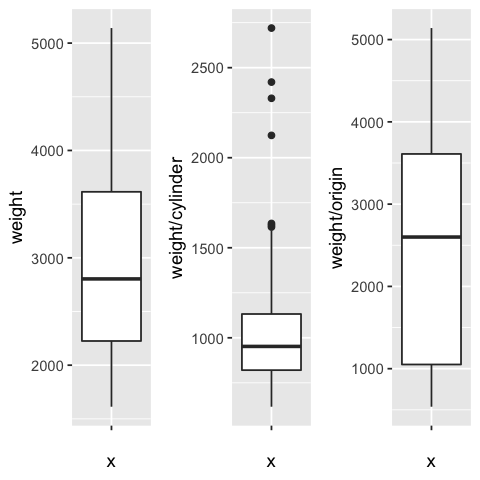

In [68]:
#boxplots for weight
p14 <- ggplot(data_cleaned, aes(x="",y=weight)) + geom_boxplot()
p15 <- ggplot(data_cleaned, aes(x="",y=weight/as.numeric(as.factor(cylinders)))) + geom_boxplot()+labs(y="weight/cylinder")
p16 <- ggplot(data_cleaned, aes(x="",y=weight/as.numeric(as.factor(origin)))) + geom_boxplot()+labs(y="weight/origin")
grid.arrange(p14,p15,p16, nrow=1)


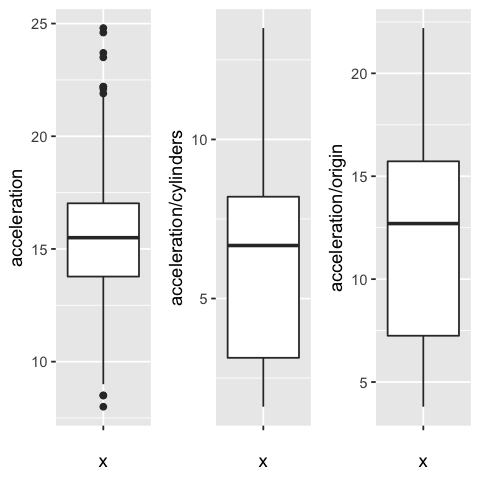

In [71]:
p17 <- ggplot(data_cleaned, aes(x="",y=acceleration)) + geom_boxplot()
p18 <- ggplot(data_cleaned, aes(x="",y=acceleration/as.numeric(as.factor(cylinders)))) + geom_boxplot()+labs(y="acceleration/cylinders")
p19 <- ggplot(data_cleaned, aes(x="",y=acceleration/as.numeric(as.factor(origin)))) + geom_boxplot()+labs(y="acceleration/origin")
grid.arrange(p17,p18,p19, nrow=1)

=====================================================================================================================

## Question 7

Next, we will try to predict the mileage per gallon of a car using linear regression. Complete the following steps:

**a)** Split the dataset in training (75%) and testing set (25%). You can use any method, but explain how you ensured that the final distribution is correct.

**Answer:** I am splitting into the main dataset into test and training datasets using a random group mark. We need to use set.seed() function in order to generate the same numbers each time and call the new variable `gp`. Then using the subset() function and the condition on `gp` we create the test and training data.

In [78]:
#Splitting into test and training datasets using a random group mark
set.seed(456)

#use runif() to generate random values from the uniform distribution on the interval from min=0 to max=1
data_cleaned$gp <- runif(dim(data_cleaned)[1])

#Splitting into test and training
test_data <- subset(data_cleaned, data_cleaned$gp <= 0.25) # 25% of the data to test the model
training_data <- subset(data_cleaned, data_cleaned$gp > 0.25) # 75% of the data to train the model

#recheck the % on training
sum(data_cleaned$gp>0.25)/dim(data_cleaned)[1]

[1] 0.752551

**b)** Train a simple linear regression model that predicts mpg as a function of horsepower.

**Answer:**

In [82]:
model1 <- lm(mpg ~ horsepower, data = training_data)
summary(model1)
#coef(model1)


Call:
lm(formula = mpg ~ horsepower, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5110  -3.2176  -0.3752   2.8308  16.9857 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.858807   0.812233   49.07   <2e-16 ***
horsepower  -0.157608   0.007298  -21.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.873 on 293 degrees of freedom
Multiple R-squared:  0.6142,	Adjusted R-squared:  0.6128 
F-statistic: 466.4 on 1 and 293 DF,  p-value: < 2.2e-16


**c)** Report the $R^2$ and the RMSE (root mean squared error) for training set of the linear model and the coeficient in the obtained regression function. What can we tell about the relationship between mpg and horsepower? Is it significant?

**Answer:** $R^2 = 0.614$ and the $RMSE = 4.856$. The relation between the mpg and horsepower is negative which is not surprising since we have found the same relation in the previous exercises. The coeficient is significant at
99.9% level.

In [87]:
#create pred_mpg
training_data$pred_mpg <- predict(model1, newdata = training_data)

#R^2 function(formula from the book)
rsq <- function(y,f) {1 - sum((y-f)^2)/sum((y-mean(y))^2)} #y is the actual, f is the prediction
rsq(training_data$mpg ,training_data$pred_mpg)

[1] 0.6141623

In [86]:
#RMSE function(formula from the book)
rmse <- function(y, f) {sqrt(mean( (y-f)^2 )) } #y is the actual, f is the prediction
rmse(training_data$mpg, training_data$pred_mpg)

[1] 4.856365

**d)** Predict mpg for the *testing set* data. Report the resulting $R^2$ and RMSE. How does it compare to the training set?

**Answer:** The results are slightly different from the training dataset. $R^2 = 0.58$ and the
$RMSE = 5.005$. The $R^2$ in test data is lower compared to the train data while RMSE is larger.

In [88]:
test_data$pred_mpg <- predict(model1, newdata = test_data)
rsq(test_data$mpg ,test_data$pred_mpg)
rmse(test_data$mpg ,test_data$pred_mpg)

[1] 0.5801171

[1] 5.0048

**e)** Repeat steps b-d using all available variables. Explain your findings. Compare this model to the simple linear regression.

**Answer:** First I am regressing mpg on all other variables except `car_name` from the traininig dataset. I found $R^2=0.879$ and the $RMSE = 2.714$ which are much better than the previous model. Remember that we want $R^2$ to be as much as possible close to 1 and $RMSE$ as small as possible. So this model does better prediction on mpg than the previous ones. The regression results are shown below. We see that coeficients for variables displacement and acceleration are not significant but weight and horsepower are significant at 99.9% and 99% level respectively. For the categorical variables the model generates dummies for each category and takes as base level one of them. For example
category cylinder3 is the base. When I apply this model to the test dataset and do the mpg prediction the results for $R^2$ and $RMSE$ are 0.846 and 3.029 respectively. We conclude that this model better performs on both train and test datasets compared to
the previous models.

In [91]:
model2 <- lm(mpg ~ horsepower + cylinders + displacement + weight + acceleration + model_year + origin,
             data = training_data)
summary(model2)



Call:
lm(formula = mpg ~ horsepower + cylinders + displacement + weight + 
    acceleration + model_year + origin, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0106 -1.7832 -0.0106  1.5125 10.5789 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.8743252  2.7158575  11.736  < 2e-16 ***
horsepower   -0.0442468  0.0145759  -3.036 0.002633 ** 
cylinders4    5.8787745  1.7722569   3.317 0.001033 ** 
cylinders5    5.3020945  3.5522134   1.493 0.136696    
cylinders6    3.4399947  2.0072451   1.714 0.087707 .  
cylinders8    5.1419189  2.3146057   2.222 0.027140 *  
displacement  0.0136954  0.0079843   1.715 0.087430 .  
weight       -0.0050466  0.0006982  -7.228 4.95e-12 ***
acceleration -0.0241382  0.1022164  -0.236 0.813495    
model_year71  1.1209701  0.9036006   1.241 0.215838    
model_year72 -0.0631662  0.8900106  -0.071 0.943472    
model_year73 -0.3863413  0.8041067  -0.480 0.631286    
model_year74  1.1888119  

In [92]:
#R^2 and RMSE for training dataset
training_data$pred_mpg2 <- predict.lm(model2, newdata = training_data)
rsq(training_data$mpg ,training_data$pred_mpg2)
rmse(training_data$mpg ,training_data$pred_mpg2)


[1] 0.8794667

[1] 2.71433

In [93]:
#R^2 and RMSE for testing dataset
test_data$pred_mpg2 <- predict(model2, newdata = test_data)
rsq(test_data$mpg ,test_data$pred_mpg2)
rmse(test_data$mpg ,test_data$pred_mpg2)

[1] 0.8462246

[1] 3.028768

**f)** Use backward selection to eliminate non significant predictors from your model, until only significant coefficients remain (p<0.05). How does this model compare to the previous two?

**Answer:** For this question I have already eliminated the variable car name. Using the backward selection, now I will eliminate accelerate and displacement. The results are those of Table 5. I also removed model year, origin and cylinder and at the end I got only intercept, horsepower and weight significant. However I do prefer to keep model with model year, origin and cylinder even though some of the categories are not significant. This model has slightly smaller $R^2=0.8784$ and slightly larger $RMSE = 2.73$ for training data and $R^2= 0.846$ and $RMSE = 3.033$ for test dataset.

In [94]:
model3 <- lm(mpg ~ horsepower + cylinders + weight + model_year + origin, data = training_data)
summary(model3)


Call:
lm(formula = mpg ~ horsepower + cylinders + weight + model_year + 
    origin, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9406 -1.7158 -0.1726  1.5150 11.0154 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.0136347  2.2485693  13.793  < 2e-16 ***
horsepower   -0.0341710  0.0112160  -3.047 0.002540 ** 
cylinders4    6.4663527  1.7206812   3.758 0.000209 ***
cylinders5    6.5371872  3.4697025   1.884 0.060613 .  
cylinders6    4.8461970  1.8185168   2.665 0.008158 ** 
cylinders8    7.3598775  1.9255220   3.822 0.000164 ***
weight       -0.0046700  0.0005724  -8.158 1.24e-14 ***
model_year71  1.1279575  0.9011527   1.252 0.211753    
model_year72 -0.2145045  0.8867841  -0.242 0.809046    
model_year73 -0.4055364  0.8048435  -0.504 0.614758    
model_year74  1.0599431  0.9479953   1.118 0.264508    
model_year75  0.7743902  0.9399332   0.824 0.410726    
model_year76  1.8986725  0.9113917   2.083 0.038154 *  

In [95]:
training_data$pred_mpg3 <- predict.lm(model3, newdata = training_data)
rsq(training_data$mpg ,training_data$pred_mpg3)
rmse(training_data$mpg ,training_data$pred_mpg3)

[1] 0.8781042

[1] 2.729627

In [96]:
test_data$pred_mpg3 <- predict(model3, newdata = test_data)
rsq(test_data$mpg ,test_data$pred_mpg3)
rmse(test_data$mpg ,test_data$pred_mpg3)

[1] 0.8457915

[1] 3.03303

=====================================================================================================================

## Question 8

Write a conclusion (at most 18 sentences) summarizing the most important findings of the assignment. 
What did we learn about the dataset?

**Answer:** We learned how to check for missing variables or outliers and how to deal with
them. Plotting the correlation matrix for numerical variables helps us see the relationships
between two variables and how strong is this relation. Another way to see the relationship
is using scaterplots which helps us visualize the relation of two variables. Boxplots helps us
better realize the outliers and see in which ranges are most of the data. Using a random
group mark we split the data into training and test sets. In order to measure the performance
of the models we use measures as $R^2$ and $RMSE$ where the former is the coefficient of
determination and can be thought of as what fraction of the y variation is explained by the
model while the latter is the most common goodness of fit.